In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

Generating Random Data

In [60]:
num_samples = 1000
data = {
    "Age": np.random.normal(loc=40,scale=10,size=num_samples).astype(int),
    "Income":np.random.normal(loc=50000,scale=10000,size=num_samples).astype(int)
}
df = pd.DataFrame(data)
df
    

,Age,Income
0,28,57851
1,33,32223
2,30,57147
3,34,47662
4,37,57074
...,...,...
995,37,72098
996,47,53269
997,34,41648
998,39,66529


In [71]:
# Introducing Null Values
df.loc[df.sample(frac=0.1).index, "Age"] = np.nan
# Introduce outliers
df.loc[df['Age'] > 70, 'Age'] = df['Age'] + 20

In [72]:
# Handling Null Values:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [75]:
# Handling outliers (using z-score for example)
z_scores = stats.zscore(df['Age'])
df_no_outliers = df[(z_scores < 3)]

In [76]:
df

,Age,Income
0,28.000000,57851
1,39.122525,32223
2,30.000000,57147
3,34.000000,47662
4,37.000000,57074
...,...,...
995,37.000000,72098
996,47.000000,53269
997,39.122525,41648
998,39.000000,66529


In [77]:
df["Age"] = df["Age"].round().astype(int)

In [78]:
df

,Age,Income
0,28,57851
1,39,32223
2,30,57147
3,34,47662
4,37,57074
...,...,...
995,37,72098
996,47,53269
997,39,41648
998,39,66529


In [81]:
num_bins = 5
bin_width = (df["Age"].max() - df["Age"].min())/ num_bins
bin_edges = [df['Age'].min() + i * bin_width for i in range(num_bins + 1)]
bin_labels = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(num_bins)]

# Perform equal width binning using cut() function
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new bin column
df

,Age,Income,Age_Bin
0,28,57851,12-29
1,39,32223,29-45
2,30,57147,29-45
3,34,47662,29-45
4,37,57074,29-45
...,...,...,...
995,37,72098,29-45
996,47,53269,45-62
997,39,41648,29-45
998,39,66529,29-45


In [82]:
bin_edges

[12.0, 28.6, 45.2, 61.800000000000004, 78.4, 95.0]

In [83]:
df['Age_Bin_qcut'] = pd.qcut(df['Age'], q=num_bins, labels=False, duplicates='drop')


In [84]:
df

,Age,Income,Age_Bin,Age_Bin_qcut
0,28,57851,12-29,0
1,39,32223,29-45,1
2,30,57147,29-45,0
3,34,47662,29-45,1
4,37,57074,29-45,1
...,...,...,...,...
995,37,72098,29-45,1
996,47,53269,45-62,3
997,39,41648,29-45,1
998,39,66529,29-45,1


In [87]:
scaler = MinMaxScaler()
df['Income_MinMax'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax
0,28,57851,12-29,0,0.657288
1,39,32223,29-45,1,0.280738
2,30,57147,29-45,0,0.646944
3,34,47662,29-45,1,0.507582
4,37,57074,29-45,1,0.645871
...,...,...,...,...,...
995,37,72098,29-45,1,0.866618
996,47,53269,45-62,3,0.589965
997,39,41648,29-45,1,0.419218
998,39,66529,29-45,1,0.784793


,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_ZScore
0,28,57851,12-29,0,0.657288,0.735244
1,39,32223,29-45,1,0.280738,-1.724874
2,30,57147,29-45,0,0.646944,0.667665
3,34,47662,29-45,1,0.507582,-0.242832
4,37,57074,29-45,1,0.645871,0.660657
...,...,...,...,...,...,...
995,37,72098,29-45,1,0.866618,2.102861
996,47,53269,45-62,3,0.589965,0.295402
997,39,41648,29-45,1,0.419218,-0.820136
998,39,66529,29-45,1,0.784793,1.568274


In [93]:
df['Income_Z_Score'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_ZScore,Income_Z_Score
0,28,57851,12-29,0,0.657288,0.735244,0.657288
1,39,32223,29-45,1,0.280738,-1.724874,0.280738
2,30,57147,29-45,0,0.646944,0.667665,0.646944
3,34,47662,29-45,1,0.507582,-0.242832,0.507582
4,37,57074,29-45,1,0.645871,0.660657,0.645871
...,...,...,...,...,...,...,...
995,37,72098,29-45,1,0.866618,2.102861,0.866618
996,47,53269,45-62,3,0.589965,0.295402,0.589965
997,39,41648,29-45,1,0.419218,-0.820136,0.419218
998,39,66529,29-45,1,0.784793,1.568274,0.784793


In [94]:
df.drop(["Income_ZScore"], axis = 1)

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_Z_Score
0,28,57851,12-29,0,0.657288,0.657288
1,39,32223,29-45,1,0.280738,0.280738
2,30,57147,29-45,0,0.646944,0.646944
3,34,47662,29-45,1,0.507582,0.507582
4,37,57074,29-45,1,0.645871,0.645871
...,...,...,...,...,...,...
995,37,72098,29-45,1,0.866618,0.866618
996,47,53269,45-62,3,0.589965,0.589965
997,39,41648,29-45,1,0.419218,0.419218
998,39,66529,29-45,1,0.784793,0.784793


In [95]:
max_income_length = len(str(df['Income'].max()))

df['Income_DecimalScaled'] = df['Income'] / (10 ** max_income_length)
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_ZScore,Income_Z_Score,Income_DecimalScaled
0,28,57851,12-29,0,0.657288,0.735244,0.657288,0.57851
1,39,32223,29-45,1,0.280738,-1.724874,0.280738,0.32223
2,30,57147,29-45,0,0.646944,0.667665,0.646944,0.57147
3,34,47662,29-45,1,0.507582,-0.242832,0.507582,0.47662
4,37,57074,29-45,1,0.645871,0.660657,0.645871,0.57074
...,...,...,...,...,...,...,...,...
995,37,72098,29-45,1,0.866618,2.102861,0.866618,0.72098
996,47,53269,45-62,3,0.589965,0.295402,0.589965,0.53269
997,39,41648,29-45,1,0.419218,-0.820136,0.419218,0.41648
998,39,66529,29-45,1,0.784793,1.568274,0.784793,0.66529


In [98]:
five_num_summary = df['Income'].describe(percentiles=[.25, .5, .75])

five_num_summary = five_num_summary.round()
# Display the five-number summary
print("Five-Number Summary for Income:")
print(f"Minimum: {five_num_summary['min']}")
print(f"Q1 (25th percentile): {five_num_summary['25%']}")
print(f"Median (50th percentile): {five_num_summary['50%']}")
print(f"Q3 (75th percentile): {five_num_summary['75%']}")
print(f"Maximum: {five_num_summary['max']}")


Five-Number Summary for Income:
Minimum: 13116.0
Q1 (25th percentile): 43078.0
Median (50th percentile): 50050.0
Q3 (75th percentile): 57234.0
Maximum: 81176.0


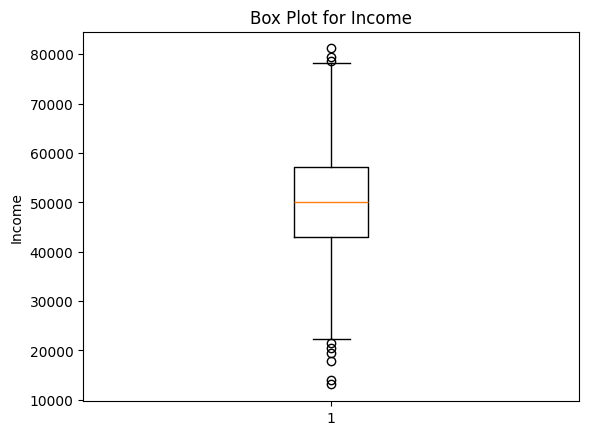

In [97]:
plt.boxplot(df['Income'])
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()
